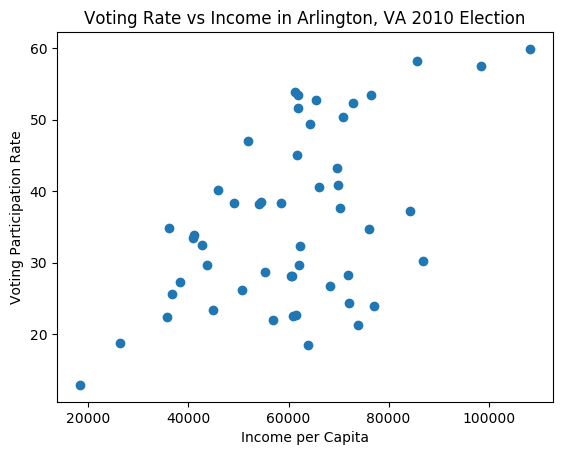

In [1]:
import pandas as pd
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import pickle

data = pd.read_pickle('Data/precinct_data.pkl')
sd = data.sort_values(by=['income_per_cap'])

income = sd['income_per_cap'].tolist()
voting = sd['vote_rate'].tolist()

plt.plot(income, voting, 'o')
plt.xlabel('Income per Capita')
plt.ylabel('Voting Participation Rate')
plt.title('Voting Rate vs Income in Arlington, VA 2010 Election')
plt.show()